In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [3]:
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 4043, done.
remote: Counting objects: 100% (4043/4043), done.
remote: Compressing objects: 100% (3070/3070), done.
remote: Total 4043 (delta 1185), reused 2778 (delta 916), pack-reused 0
Receiving objects: 100% (4043/4043), 54.68 MiB | 31.13 MiB/s, done.
Resolving deltas: 100% (1185/1185), done.


In [8]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━

In [33]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage
import os

from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils

import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

In [30]:
rootDirPath = "/content/drive/MyDrive/CoronaryArtery"
defectPath = os.path.join(rootDirPath, "Defect")
normalPath = os.path.join(rootDirPath, "Normal")

In [25]:
image = Image.open(os.path.join(defectPath, "image_1.jpg"))
a = np.array(image)
print(a.shape)

(512, 512, 3)


In [29]:
def ConvertToNumpy(path):
  image = Image.open(path)
  imageArray = np.array(image, dtype="uint8")
  return imageArray

In [31]:
totalImageArray = []

for path in os.listdir(defectPath):
  imagePath = os.path.join(defectPath, path)
  imageArray = ConvertToNumpy(imagePath)
  totalImageArray.append(imageArray)

totalImageArray = np.array(totalImageArray)

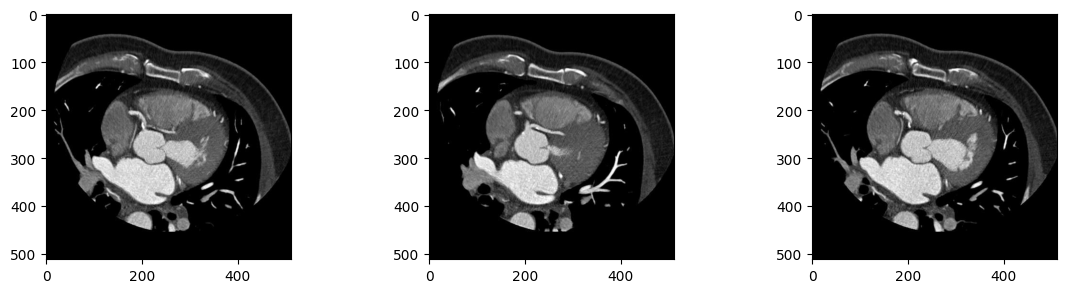

In [35]:
plt.rcParams["figure.figsize"] = [14, 7]

for i, imageArray in enumerate(totalImageArray):
  plt.subplot(2, 3, i + 1)
  plt.imshow(imageArray)

plt.show()

In [37]:
gtBoxes = []
colab_utils.annotate(totalImageArray, box_storage_pointer=gtBoxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'--boxes array populated--'

<IPython.core.display.Javascript object>

In [39]:
gtBoxes

[array([[0.44441667, 0.41015625, 0.49275   , 0.53515625]]),
 array([[0.44275   , 0.41210938, 0.50608333, 0.56054688]]),
 array([[0.38775   , 0.3359375 , 0.47108333, 0.41210938]])]

In [40]:
np.save("/content/drive/MyDrive/BBoxCoordinates", gtBoxes)

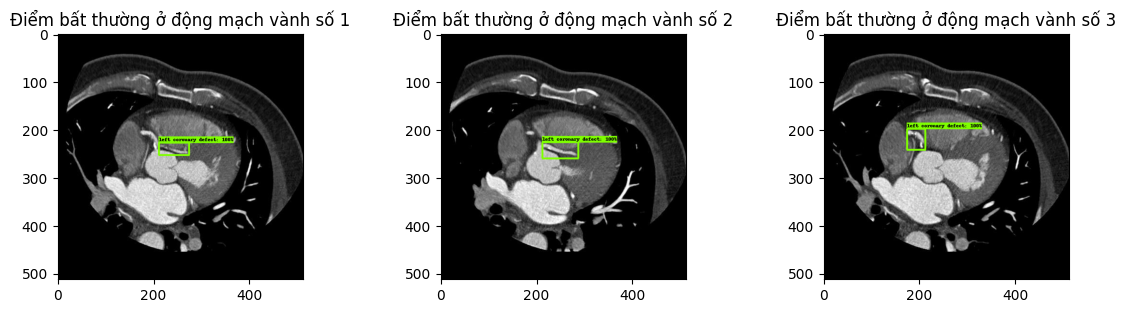

In [49]:
matplotlib.rc('font', size=10)
for i in range(3):
  plt.subplot(2, 3, i + 1)
  imageArrayWithAnnotations = totalImageArray[i].copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(imageArrayWithAnnotations,
                                                      gtBoxes[i], np.ones(shape=[gtBoxes[i].shape[0]], dtype=np.int32),
                                                      np.array([1.0], dtype=np.float32),
                                                       {1: {'id': 1, 'name': 'left coronary defect'}},
                                                      use_normalized_coordinates=True, min_score_thresh=0.8)
  plt.imshow(imageArrayWithAnnotations)
  plt.title(f'Điểm bất thường ở động mạch vành số {i + 1}')